### GOOGLE PLAY STORE ANALYSIS PROJECT

- *Understand the trend of applications available on the google play store with a focus on promoting advertisements on particular applications which are trending in the market and can lead to maximum profit.*              
- *Analyze detailed information on apps in the Google Play Store to discover insights on app features and the current state of the Android app market.*

### LIBRARIES 

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#display the graphs
%matplotlib inline

#display values to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x) 

### READING THE DATASET

In [2]:
#read the csv file into a dataframe
data = pd.read_csv("C:\\Users\\REY\\OneDrive\\Desktop\\NYDSA\\GOOGLE PLAYSTORE CASE STUDY\\googleplaystore.csv")

#create a copy of the data
df = data.copy()

#display first five rows of the dataset
df.head() 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.10,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.90,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.70,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.50,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.30,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#total number of rows and columns of the dataset
df.shape

(10841, 13)

### DESCRIPTIVE SUMMARY OF DATASET:
- There are a total of **10,841** rows and **13** columns in the dataset.
- The names of the apps are specified under the **App** column.
- The apps are grouped into different categories and displayed under the **Category** column.
- The **Ratings** and **Reviews** columns display the performance of each app as stated by the users.
- The size of each app is displayed in kilobytes in the **Size** column and the number of downloads for each app specified in the **Installs** column.
- The apps have been grouped into either Paid or Free under the **Type** column and their corresponding prices shown in the **Price** column.
- The **Content Rating** column describes the age group of the users for which the app has been developed.
- **Genres** provides information on the different groupings of the apps. However, this information is similar to the one provided in the Category column.
- **Last Updated** column shows the dates for the most recent updates installed by the creators.
- **Current Version** column shows the recent versions of the apps and the **Android Version** column shows the version of the Android OS the app is compatible with.

### DATASET INFORMATION

In [4]:
#displays the datatypes of the columns in the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- There are **seven(7)** object datatype columns and **five(5)** numeric datatype columns.
- The dataset occupies aproximately **1.1 MB** of memory.
- We can infer that some rows are missing data since some columns have count less than the total number of rows.This will be treated in the data cleaning process.
- Some columns have numeric values but are represented as object datatype. They will be converted to more appropriate datatypes for analysis.
- Columns that will not be used for this analysis will be dropped.

#### DROP REDUNDANT COLUMNS

In [5]:
#list of columns to drop from dataset
col_to_drop = ['Type', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 

#drop listed columns
df = df.drop(columns = col_to_drop)

#verify results of the drop
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating'],
      dtype='object')

- Columns dropped as seen.

#### COLUMN CONVERSION

In [6]:
#columns to convert to integer datatype
col_to_check = ['Reviews'] 

#checking for non-numeric rows
non_numeric_values = {}
for row in col_to_check:
    non_numeric_values[row] = df.loc[pd.to_numeric(df[row], errors = 'coerce').isnull()]

#display result in tabular format
non_numeric_df = pd.concat(non_numeric_values, ignore_index = True)
non_numeric_df

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
0,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.00,3.0M,"1,000+",Free,Everyone,NaN


In [7]:
#drop disruptive row
df.drop(df[df['Reviews'] == '3.0M'].index, inplace=True)

#convert Reviews column to intger type
df['Reviews'] = df['Reviews'].astype(float) 

In [8]:
#Converting string values in Size column and converting column to float type
df['Size'] = df['Size'].str.replace('+', '', regex=False) #treat + character as string NOT regex pattern
df['Size'] = df['Size'].str.replace('M', '').str.replace('Varies with device', '0').str.replace('k', '').astype(float)

In [9]:
#Converting string values in Installs column and converting column to integer type
df['Installs'] = df['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False).astype(float)

In [10]:
#Converting string values in Price column and converting column to float type
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

In [11]:
#verify the conversion of the column datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  float64
 6   Price           10840 non-null  float64
 7   Content Rating  10840 non-null  object 
dtypes: float64(5), object(3)
memory usage: 762.2+ KB


- Column conversions and row dropping successful.

### STATISTICAL SUMMARY

In [12]:
#display statistical summary for the columns in the dataset
df.describe(include = 'all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10840,9659,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10840,33,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9366.00,NaN,NaN,NaN,4.19,0.52,1.00,4.00,4.30,4.50,5.00
Reviews,10840.00,NaN,NaN,NaN,444152.90,2927760.60,0.00,38.00,2094.00,54775.50,78158306.00
Size,10840.00,NaN,NaN,NaN,31.24,91.81,0.00,3.10,10.00,28.00,1020.00
Installs,10840.00,NaN,NaN,NaN,15464338.88,85029361.40,0.00,1000.00,100000.00,5000000.00,1000000000.00
Price,10840.00,NaN,NaN,NaN,1.03,15.95,0.00,0.00,0.00,0.00,400.00
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are **9366** unique apps in the dataset.
- There are **33** unique categories and **'Family'** has the most count.
- The average rating is **4.19**;the median rating is **4.36**.
- There is notable standard deviation in the reviews received.
- The average size of apps on the platform is **31.24 KB**, which is significantly larger than the median size.
- The maximum number of installs for an app is **one billion** which could be an outlier.
- The average price of an app is approximately **one dollar**.
- The content rating is represented in **six** unique categories with **'Everyone'** being the most frequent.
- Some columns display NaN because they either have no unique result or are non-numeric variables.

### MISSING VALUE TREATMENT

In [13]:
#check for missing values
df.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Price                0
Content Rating       0
dtype: int64

- **1474** rows missing in the Rating column.

#### COLUMN IMPUTATION

In [14]:
#Since the column mean is close to the column median, the missing values can be imputed with the column mean. 
df['Rating'] = df['Rating'].fillna(value = df['Rating'].mean())

In [15]:
#verify results of the imputation
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
dtype: int64

In [16]:
#verify the new statistical summary for the Rating column
df[['Rating']].describe(include = 'all').T 

,count,mean,std,min,25%,50%,75%,max
Rating,10840.00,4.19,0.48,1.00,4.10,4.20,4.50,5.00


- Imputation was successful.
- Insignificant imapact- Median reduced by 0.1 and Std increased by 0.04.

### DATA ANALYSIS AND VISUALIZATION

### RATING

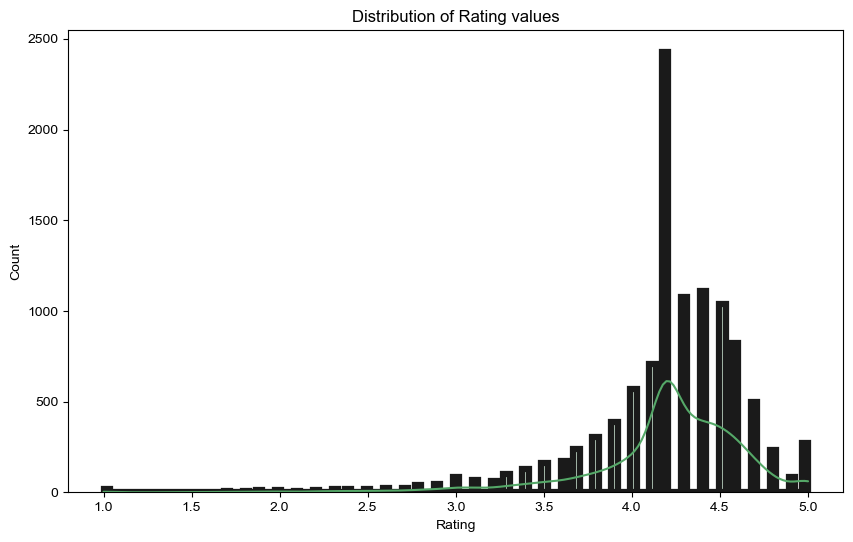

In [17]:
#size of the plot
plt.figure(figsize = (10, 6))

#Title of the graph
plt.title('Distribution of Rating values')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(df["Rating"], kde = True, color = "g", alpha = 0.3, linewidth = 4.5, edgecolor = "k")

#display the graph
plt.show();

In [18]:
#peak rating
pd.DataFrame(df['Rating'].value_counts().sort_values(ascending = False).head(1)) 

,Rating
4.19,1474


- Significantly right skewed distribution.
- Concentration of values between 4.0 - 4.5 with a peak at approximately 4.2.

#### BOXPLOT OF RATINGS

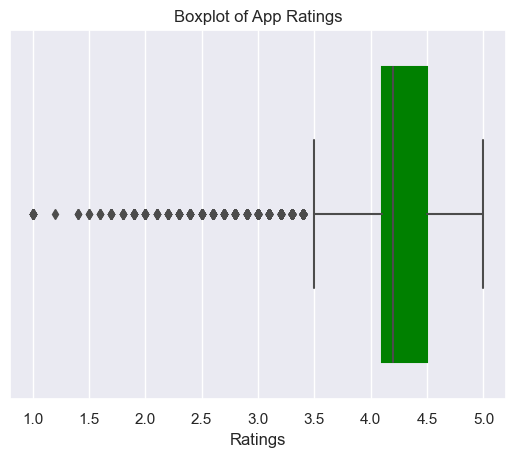

In [19]:
#create the boxplot
sns.boxplot(data = df, x = df['Rating'], boxprops = {'color': 'green'})

#label of the y-axis
plt.xlabel('Ratings') 

#title of the graph
plt.title('Boxplot of App Ratings') 

#display the graph
plt.show; 

- Median value is approximately 4.2.
- Outliers indicating relatively low values.

#### VIOLIN PLOT OF RATING

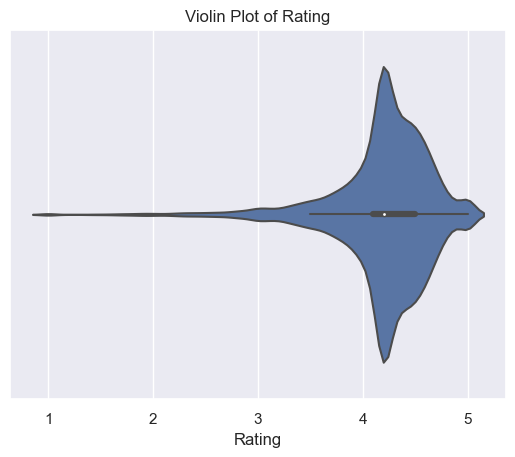

In [20]:
#title of the graph
plt.title('Violin Plot of Rating');

#create the violin plot
sns.violinplot( x = df['Rating'], data = df);

- Wide section of plot indicates concentration of values in that area.
- Long tail indicates wide range of outliers.

#### Percentage of Dominant Range

In [21]:
#filter rows using dominant range
rating_val = df[(df['Rating'] >= 4) & (df['Rating'] <= 5)]

#display statement
print('\033[1m', round((rating_val.shape[0]/df.shape[0] * 100), 1), '\033[0m', '% of the dataset falls within the dominant range.')

 81.6  % of the dataset falls within the dominant range.


#### Products that have at least 4.5 rating, a billion installs and very high reviews

In [22]:
#filter rows with at least 4.5 rating and a billion installations
good_perf = df[(df['Rating'] >= 4.5) & (df['Installs'] == 1000000000)].sort_values(by = 'Reviews', ascending = False)

#names of products in resulting table
good_prod = good_perf['App'].unique()

#display statement
print('Products in this category are:','\033[1m', good_prod[0], ',', good_prod[1], 'and', good_prod[2], '.\033[0m')

Products in this category are:  Instagram , Subway Surfers and Google Photos .


#### Products that have a perfect rating

In [23]:
#divide number of rows with perfect rating by total number of rows and multiply by 100
perf_rating = round((df[df['Rating'] == 5].shape[0]) / (df.shape[0]), 3) * 100

#display statement
print('There are','\033[1m',df[df['Rating'] == 5].shape[0],'\033[0m','products with perfect rating.')

#display statement
print('Products that have a perfect rating occupy','\033[1m',perf_rating,'\033[0m','% of this category.')

There are  274  products with perfect rating.
Products that have a perfect rating occupy  2.5  % of this category.


#### Some Products with Perfect Rating

In [24]:
#filter three products with perfect rating
df[df['Rating'] == 5].head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.00,15.00,37.00,1000.00,0.00,Everyone
612,American Girls Mobile Numbers,DATING,5.00,5.00,4.40,1000.00,0.00,Mature 17+
615,Awake Dating,DATING,5.00,2.00,70.00,100.00,0.00,Mature 17+


- Perfect rating but relatively low installs. 

#### Products with Perfect Rating and Above Mean Installs

In [25]:
df[(df['Rating'] == 5) & df['Installs'] >= df['Installs'].mean()]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating


- There are **NO** apps with perfect rating and above mean number of installations.

### REVIEWS

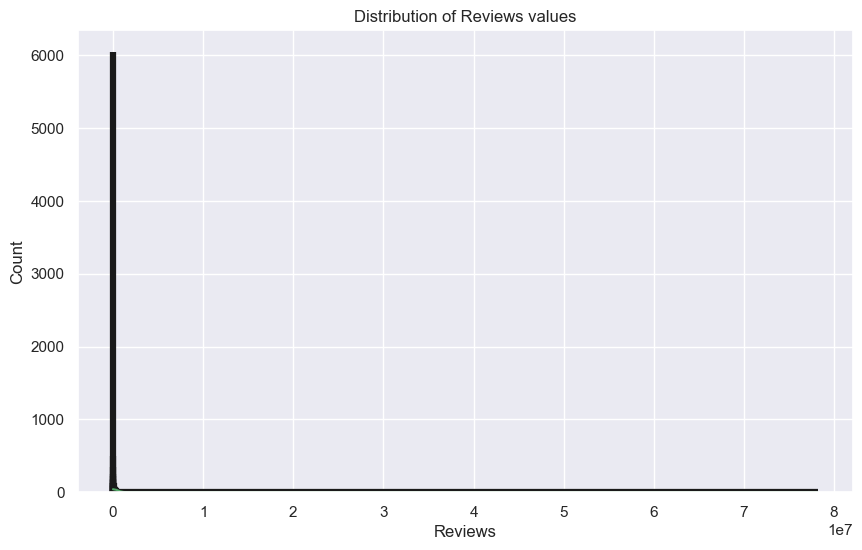

In [26]:
#size of the plot
plt.figure(figsize = (10, 6))

#Title of the graph
plt.title('Distribution of Reviews values')

#aesthetics of the graph
sns.set(style = "darkgrid")

#create the histogram
sns.histplot(df["Reviews"], kde = True, color = "g", alpha = 0.1, linewidth = 4.5, edgecolor = "k")

#display the graph
plt.show();

- Significantly right skewed distribution.
- Presence of outliers could be inferred from thin line along the x-axis.

#### KDE PLOT OF REVIEWS

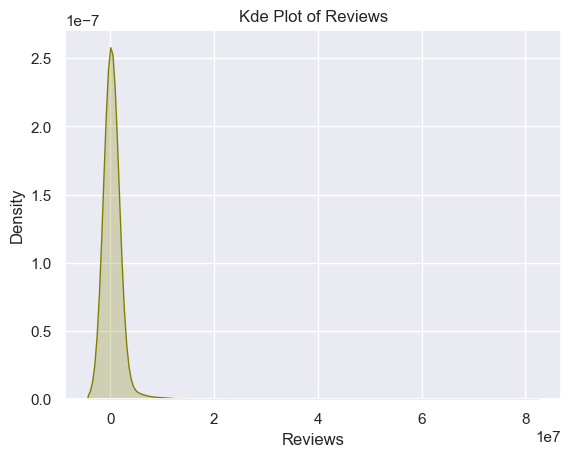

In [27]:
#title of the plot
plt.title('Kde Plot of Reviews')

#create the kdeplot
sns.kdeplot(df['Reviews'], fill = True, bw_method = 0.5, color = "olive") 

#display the graph
plt.show();

- The extension at the boundary is not important for the visualisation so will be corrected using either truncation or reflection.

#### REVIEWS (TRUNCATION)

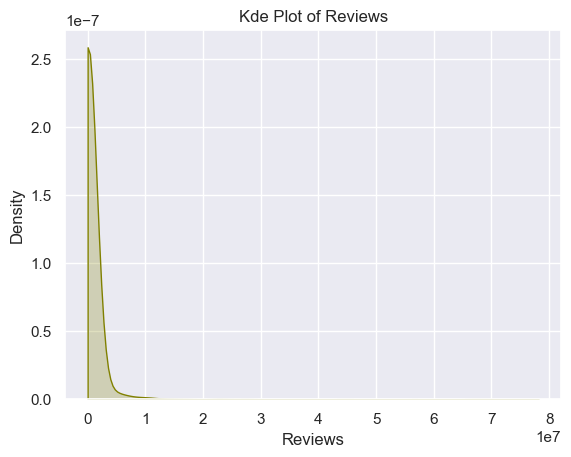

In [28]:
#title of plot
plt.title('Kde Plot of Reviews')

#set the cut parameter to implement truncation of values below zero
sns.kdeplot(df['Reviews'], fill = True, bw_method = 0.5, color = "olive", cut = 0) 

#display graph
plt.show()

#### REVIEWS (REFLECTION)

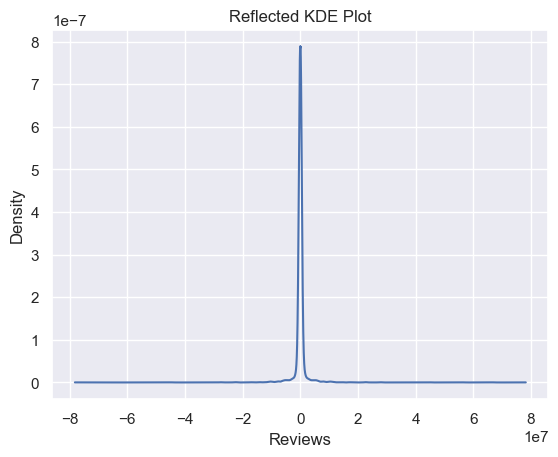

In [29]:
#library for implementing kde to series
from scipy.stats import gaussian_kde

#Filter reviews column from dataframe
df_rev = df['Reviews']

# Compute KDE estimation using scipy.stats
k = gaussian_kde(df_rev)

# Get the estimated density values
x = np.linspace(df_rev.min(), df_rev.max(), len(df_rev))
y = k.evaluate(x)

# Reflect the negative part of the density
y_reflected = np.abs(np.concatenate((y[::-1], y)))
x_reflected = np.concatenate((-x[::-1], x))

# Create a plot with the reflected density
plt.plot(x_reflected, y_reflected)

# Add labels and title
plt.xlabel("Reviews")
plt.ylabel("Density")
plt.title("Reflected KDE Plot")

# Display the plot
plt.show();

- The truncated plot is better for the purpose of this analysis so will be chosen for visualisation.

#### BOXPLOT OF REVIEWS

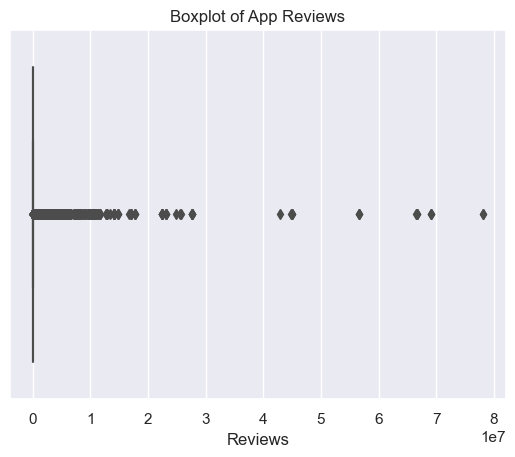

In [30]:
#create the boxplot
sns.boxplot(data = df, x = df['Reviews'], boxprops = {'color': 'green'}) 

#label of the y-axis
plt.xlabel('Reviews') 

#title of the graph
plt.title('Boxplot of App Reviews') 

#display the graph
plt.show; 

- Significant concentration of outliers indicating large volume of products with very high number of reviews.

#### VIOLIN PLOT OF REVIEWS

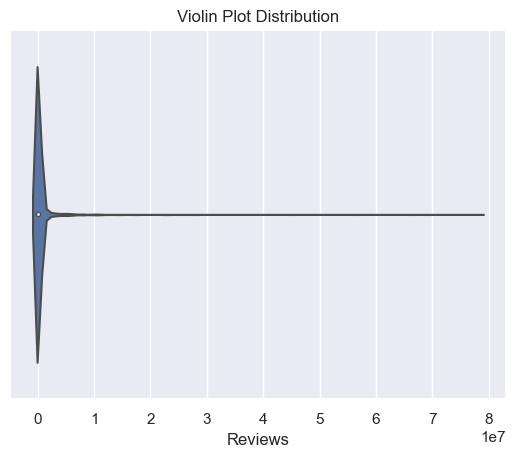

In [31]:
#violin plot of the reviews
plt.title('Violin Plot Distribution')

#create violin plot
sns.violinplot( x = df['Reviews'], data = df)

#display graph
plt.show();

- Wide section emphasizes concentration of values at that area.
- Slight extension behind lower limit due to smoothing process. Rectified by Truncation or Reflection.

#### Some Products with Low Reviews

In [32]:
df.sort_values('Reviews', ascending = True).head(3).iloc[:, [0, 3]]

,App,Reviews
6665,BAR-B-Q Recipes,0.00
7732,SHUTTLLS CQ - Connect Ride Go,0.00
7735,CQ Ukraine,0.00


#### Top Five Products with Most Reviews

In [33]:
#sort the reviews column in descending order and filter the top 10 rows of the App and Reviews columns
top_rev = df[df['Reviews'] >= df['Reviews'].mean()].sort_values(by = 'Reviews', ascending = False)

#filter the unique values from the top_rev dataframe and return the first 10 values
top_rev_prod = top_rev['App'].unique()[:6]

#display statement
print("Products with the most reviews are:")
for product in (top_rev_prod[:5]):
    print(f'\t\u2022 \033[1m{product}\033[0m')

Products with the most reviews are:
	• Facebook
	• WhatsApp Messenger
	• Instagram
	• Messenger – Text and Video Chat for Free
	• Clash of Clans


#### Percentage of Products with Above Average Number of Reviews

In [34]:
perc_rev = round((df[df['Reviews'] >= df['Reviews'].mean()].shape[0] / df.shape[0]) * 100, 1)

#display statement
print('\033[1m',perc_rev,'\033[0m','% of products have above average reviews.')

 10.2  % of products have above average reviews.


#### Products with high number of reviews and above average rating

In [35]:
#filter rows based on specified condition
df[(df['Reviews'] >= df['Reviews'].max()) & (df['Rating'] >= df['Rating'].mean())]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating


- No products with at least maximum number of reviews and above mean rating.

#### Products with above average number of reviews and high rating

In [36]:
#filter rows based on specified conditions
df[(df['Reviews'] >= df['Reviews'].mean()) & (df['Rating'] >= df['Rating'].max())]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating


- No products with at least mean number of reviews and perfect rating.

#### Top Products with Above Average Number of Reviews and Above Average Rating

In [37]:
#filter rows based on condition and sort by reviews; arrange in descending order
rev_rat = df[(df['Reviews'] >= df['Reviews'].mean()) & (df['Rating'] >= df['Rating'].mean())].sort_values(by = 'Reviews',ascending = False)

#names of the products
best_rev_rat = rev_rat['App'].unique()[:6]

#display statement
print("Products with the above mean reviews and rating are:")
for val in (best_rev_rat[:5]):
    print(f'\t\u2022 \033[1m{val}\033[0m')

Products with the above mean reviews and rating are:
	• WhatsApp Messenger
	• Instagram
	• Clash of Clans
	• Clean Master- Space Cleaner & Antivirus
	• Subway Surfers


#### Bar Graph of Top Six Products by Reviews and Ratings

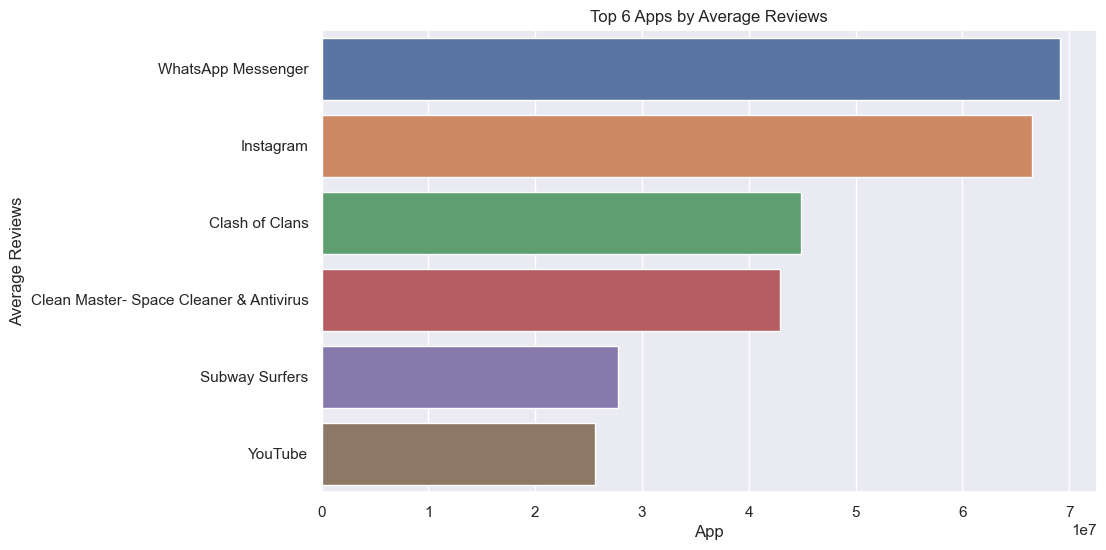

In [38]:
#top six products with great rating and reviews
top_rev_rat = rev_rat.iloc[: , [0,3]].groupby('App').mean().sort_values(by = 'Reviews', ascending = False).head(6)

#size of plot
plt.figure(figsize=(10, 6))

#create bar graph
sns.barplot(y = top_rev_rat.index, x = 'Reviews', data = top_rev_rat)

#x-axis title
plt.xlabel('App')

#y-axis title
plt.ylabel('Average Reviews')

#title of plot
plt.title('Top 6 Apps by Average Reviews')

#Displaying the plot
plt.show()

### SIZE

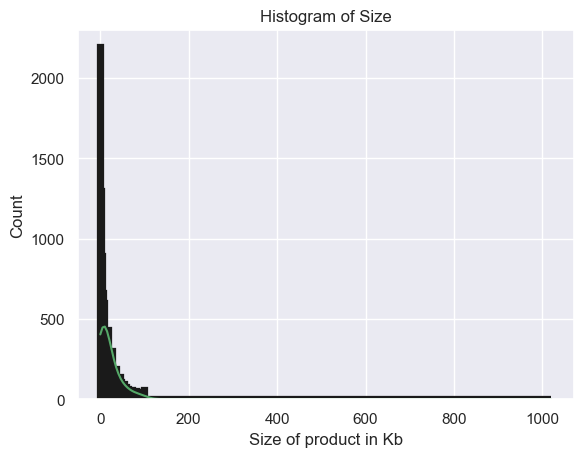

In [39]:
#create histogram
sns.histplot(df["Size"], kde = True, color = "g", alpha = 0.25, linewidth = 4.5, edgecolor = "k")

#title of plot
plt.title('Histogram of Size')

#title on x-axis
plt.xlabel('Size of product in Kb')

#display graph
plt.show()

- The distribution shows a right skewed data. Most products fall in the range of 'Varies with device' and 100 KB
- Hint of presence of outliers as seen in line along the x-axis.

#### Frequency of app sizes

In [40]:
#frequency of product sizes and arrange in descending order; display top five
pd.DataFrame(df['Size'].value_counts().sort_values(ascending = False).head())

,Size
0.00,1695
11.00,199
12.00,196
14.00,195
13.00,191


- Zero here represents the category *'Varies with device'* and NOT an actual value. It was converted to a numeric value in the data cleaning to enhance the analysis.

#### KDE PLOT OF SIZE

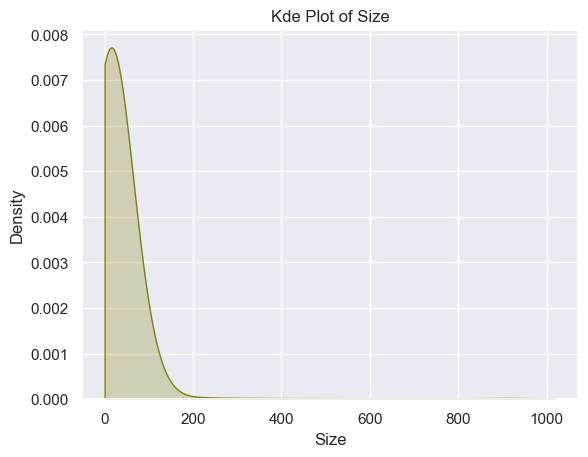

In [41]:
#title of plot
plt.title('Kde Plot of Size')

#set the cut parameter to implement truncation of values below zero
sns.kdeplot(df['Size'], fill = True, bw_method = 0.5, color = "olive", cut = 0) 

#display graph
plt.show();

- Concentration of values between 'Varies with Device' and 200 Kb.

#### BOXPLOT OF SIZE

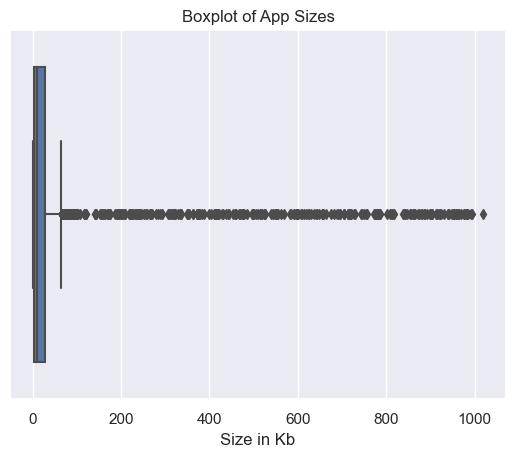

In [42]:
#create the boxplot
sns.boxplot(data = df, x = df['Size']) 

#label of the y-axis
plt.xlabel('Size in Kb') 

#title of the graph
plt.title('Boxplot of App Sizes') 

#display the graph
plt.show; 

- Significant presence of outliers.
- Products as large as 1000 Kb present in dataset.

#### Large Products

In [43]:
#sort size column in descending order and filter app and size column
df.sort_values('Size', ascending = False).head().iloc[:, [0, 4]]

,App,Size
10798,Word Search Tab 1 FR,1020.00
8883,DTPay,994.00
10402,FH Calculator,992.00
7868,CT - DTC Lookup,986.00
6798,Battery Notifier BT Free,982.00


#### Large Products with High Installations

In [44]:
#filter rows for products larger than the maximum size with at least maximum installations
df[(df['Size'] > df['Size'].max()) & (df['Installs'] >= df['Installs'].max())]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating


- NO large products with record installations.

#### Large Paywalled Products

In [45]:
#filter rows with at least maximum size and greater than zero dollars
df[(df['Size'] >= df['Size'].max()) & (df['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
10798,Word Search Tab 1 FR,FAMILY,4.19,0.00,1020.00,50.00,1.04,Everyone


- *Word Search Tab 1 FR* is the only large app which is paid.

### INSTALLS

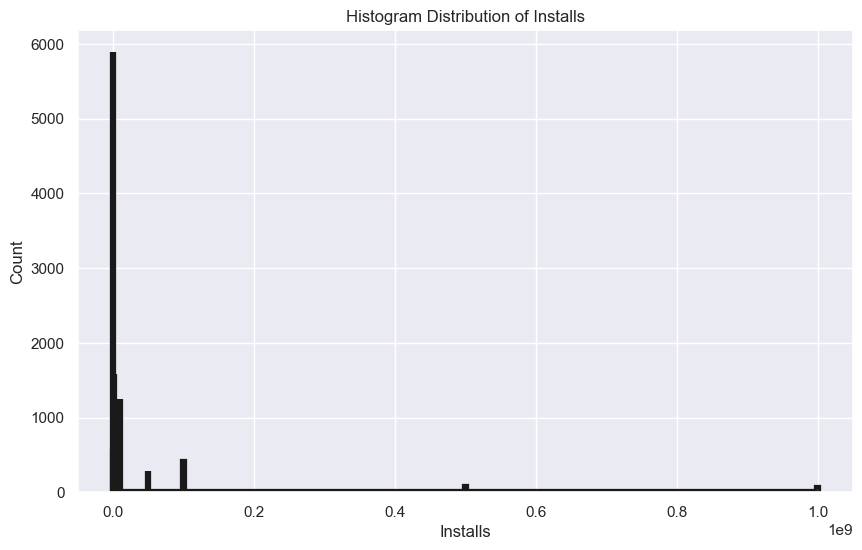

In [46]:
#size of the plot
plt.figure(figsize = (10, 6))

#title of the plot
plt.title('Histogram Distribution of Installs')

#aesthetics
sns.set(style = "darkgrid")

#create histogram
sns.histplot(df["Installs"], color = "g", alpha = 0.3, linewidth = 4.5, edgecolor = "k")

#display graph
plt.show();

- Right skewed distribution.
- Two little peaks indicate some concentration of values in those areas.
- Outliers could be present.

#### KDE PLOT

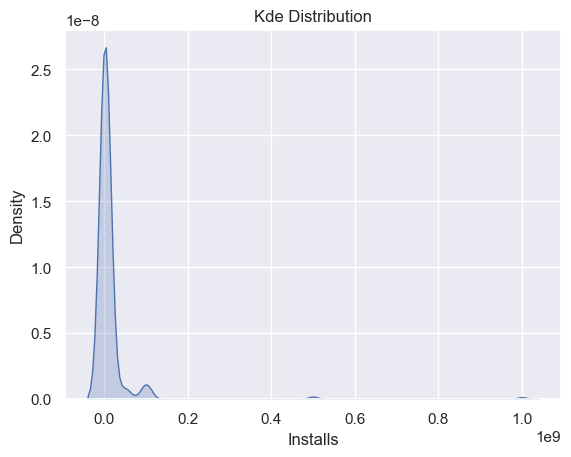

In [47]:
#title of plot
plt.title('Kde Distribution')

#create kde plot
sns.kdeplot(df['Installs'], fill = True);

#display graph
plt.show();

- Plot displays negative values. This is not important to the analysis so it will be rectified with either *Truncation or Reflection.*

#### Installs (KDE) with truncation

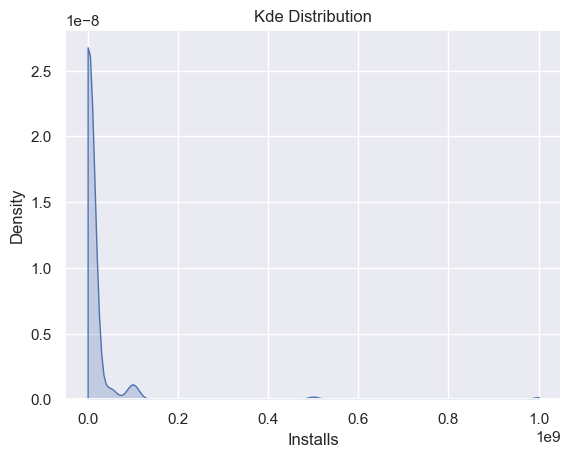

In [48]:
#plot title
plt.title('Kde Distribution')

#create kde plot with truncation by setting cut parameter
sns.kdeplot(df['Installs'], fill = True, cut = 0);

#display graph
plt.show();

- Small peak indicates some concentration of values in that area.

#### Installs(KDE) with Reflection

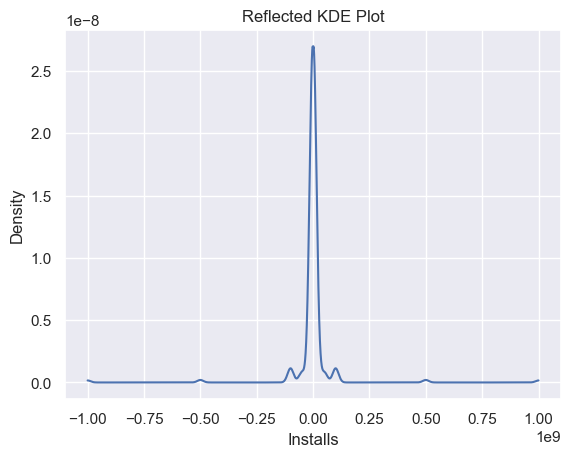

In [49]:
df_inst = df['Installs']

# Compute KDE estimation using scipy.stats
k = gaussian_kde(df_inst)

# Get the estimated density values
x = np.linspace(df_inst.min(), df_inst.max(), len(df_inst))
y = k.evaluate(x)

# Reflect the negative part of the density
y_reflected = np.abs(np.concatenate((y[::-1], y)))
x_reflected = np.concatenate((-x[::-1], x))

# Create a plot with the reflected density
plt.plot(x_reflected, y_reflected)

# Add labels and title
plt.xlabel("Installs")
plt.ylabel("Density")
plt.title("Reflected KDE Plot")

# Display the plot
plt.show()

- The truncated plot is simpler for the purpose of this analysis and visualization.

#### BOXPLOT  OF INSTALLS

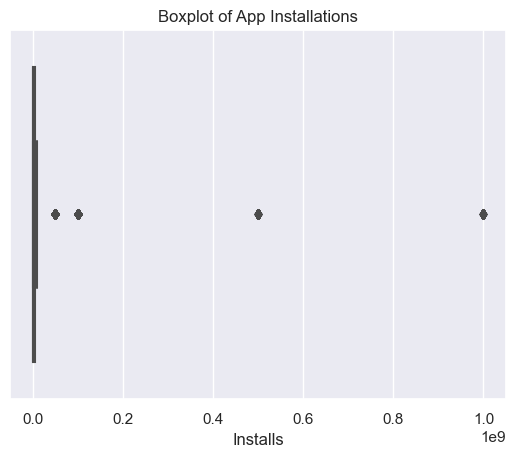

In [50]:
#create the boxplot
sns.boxplot(data = df, x = df['Installs']) 

#label of the y-axis
plt.xlabel('Installs') 

#title of the graph
plt.title('Boxplot of App Installations') 

#display the graph
plt.show; 

- Few outliers present.

#### VIOLIN PLOT OF INSTALLS

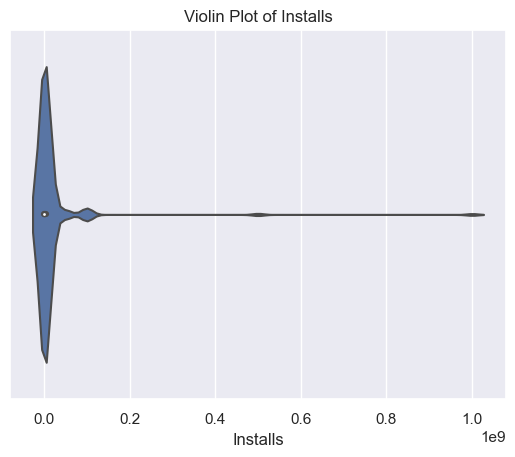

In [51]:
#title of plot
plt.title('Violin Plot of Installs')

#create violin plot
sns.violinplot(x = df["Installs"])

#display graph
plt.show();

- Slight extension into negative range. 
- Values are just an estimation so will not be considered. Catered for with truncation in kde plot.

#### Products Most Installations

In [52]:
#sort values in installs column and filter first five rows of the app and installs column; reset index of table
top_installs = pd.DataFrame(df.sort_values('Installs', ascending = False).head(10).iloc[:, [0,5]].reset_index(drop = True))

#Filter array of unique values in app column
top_df = top_installs['App'].unique()

#display statement
print("Products with most installs:")
for value in (top_df[:5]):
    print(f'\t\u2022 \033[1m{value}\033[0m')

Products with most installs:
	• Subway Surfers
	• Facebook
	• Messenger – Text and Video Chat for Free
	• Google Drive
	• Google Photos


#### Products with Billion Installations

In [53]:
#filter rows in installs column with values equal to a billion
bill_installs = df[df['Installs'] == 1000000000].shape
print('\033[1m',bill_installs[0],'\033[0m','products have a billion installations.')

#percentage of Products with a billion installations
bill_perc = round((bill_installs[0] / df.shape[0]) * 100,1)
print('These comprise','\033[1m',bill_perc,'\033[0m','% of all products.')

 58  products have a billion installations.
These comprise  0.5  % of all products.


#### Products with Good Rating and Installations

In [54]:
#filter ratings greater than 4.5 and Installations greater than or equal to maximum value
install_rating = df[(df['Rating'] >= 4.5) & (df['Installs'] >= df['Installs'].max())].sort_values(by = 'Rating', ascending = False).reset_index()

#reset index of resulting dataframe
df_install = install_rating['App'].unique()

#print statement
print('Products with good rating and high installations are:','\033[1m',df_install[0], ',',df_install[1], 'and',df_install[2], '.\033[0m')

Products with good rating and high installations are:  Subway Surfers , Instagram and Google Photos .


#### Products with High Installations and Reviews

In [55]:
#filter based on conditions and sort by Reviews in descending order
install_rev = df[(df['Installs'] >= df['Installs'].mean()) & (df['Reviews'] >= df['Reviews'].mean())].sort_values(by = 'Reviews', ascending = False)

#reset index of resulting dataframe
df_install_rev = install_rating['App'].unique()

#print statement
print("Products with most reviews and installs:")
for x in (df_install_rev[:10]):
    print(f'\t\u2022 \033[1m{x}\033[0m')

Products with most reviews and installs:
	• Subway Surfers
	• Instagram
	• Google Photos


### PRICE

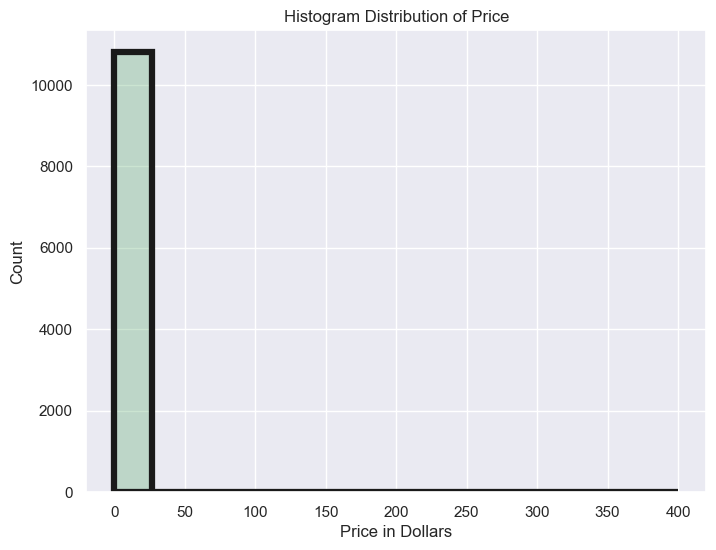

In [56]:
#size of the plot
plt.figure(figsize = (8, 6))

#title of the plot
plt.title('Histogram Distribution of Price')

#aesthetics
sns.set(style = "darkgrid")

#create histogram
sns.histplot(df["Price"], color = "g", alpha = 0.3, linewidth = 4.5, edgecolor = "k")

#label of the x-axis
plt.xlabel('Price in Dollars') 

#display graph
plt.show();

- Right skewed distribution.
- Maximum value is 400 dollars.

#### KDE PLOT (PRICE)

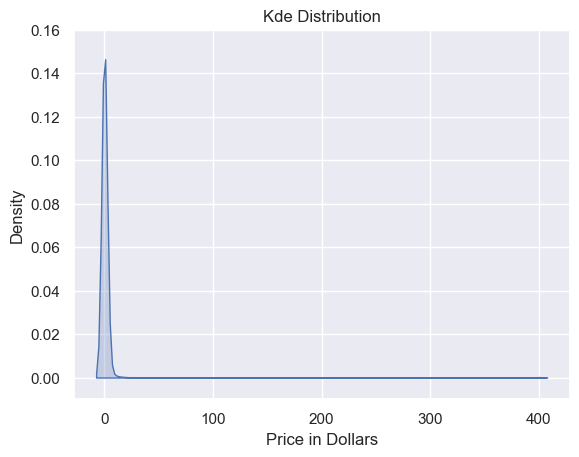

In [57]:
#title of plot
plt.title('Kde Distribution')

#create kde plot
sns.kdeplot(df['Price'], fill = True);

#label of the x-axis
plt.xlabel('Price in Dollars') 

#limits on y-axis
plt.ylim(-0.01, 0.16)

#display graph
plt.show();

- Slight extension on the left to be corrected using truncation or reflection.

#### KDE PLOT (PRICE) WITH TRUNCATION

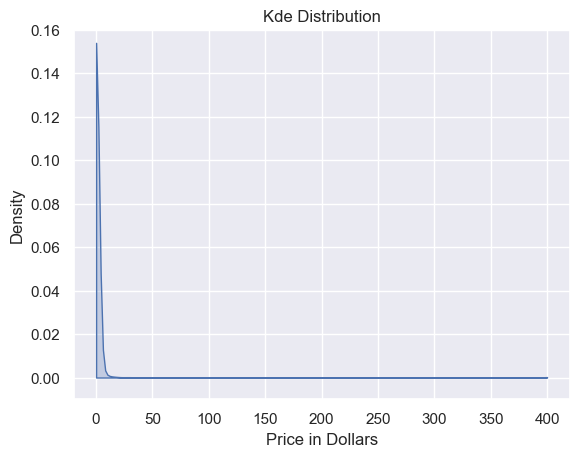

In [58]:
#title of plot
plt.title('Kde Distribution')

#create kde plot
sns.kdeplot(df['Price'], fill = True, cut = 0);

#label of the x-axis
plt.xlabel('Price in Dollars') 

#limits on y-axis
plt.ylim(-0.01, 0.16)

#display graph
plt.show();

- Extension on the left truncated. Lower limit on x-axis is 0.

#### KDE PLOT (PRICE) WITH REFLECTION

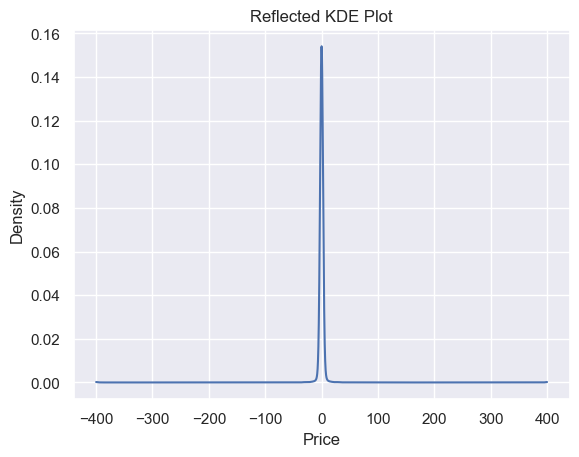

In [59]:
df_price = df['Price']

# Compute KDE estimation using scipy.stats
k = gaussian_kde(df_price)

# Get the estimated density values
x = np.linspace(df_price.min(), df_price.max(), len(df_price))
y = k.evaluate(x)

# Reflect the negative part of the density
y_reflected = np.abs(np.concatenate((y[::-1], y)))
x_reflected = np.concatenate((-x[::-1], x))

# Create a plot with the reflected density
plt.plot(x_reflected, y_reflected)

# Add labels and title
plt.xlabel("Price")
plt.ylabel("Density")
plt.title("Reflected KDE Plot")

# Display the plot
plt.show();

- The truncated plot is better for this analysis and visualisation.

#### BOXPLOT PRICE

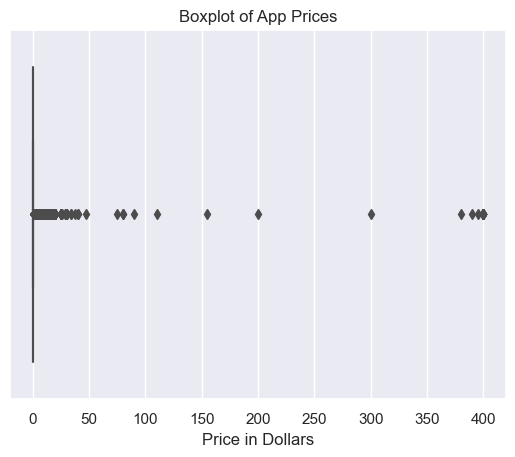

In [60]:
#create the boxplot
sns.boxplot(data = df, x = df['Price']) 

#title of the graph
plt.title('Boxplot of App Prices')

#label of the x-axis
plt.xlabel('Price in Dollars') 

#display the graph
plt.show; 

- Presence of many outliers indicating some relatively expensive products.

#### VIOLIN PLOT OF PRICE

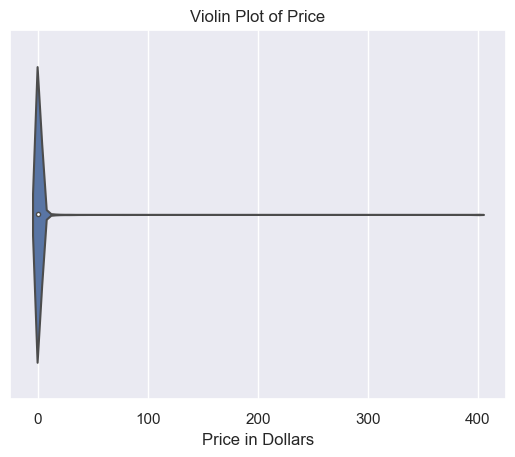

In [61]:
#title
plt.title('Violin Plot of Price')

#create violinplot
sns.violinplot(x = df["Price"])

#label of the x-axis
plt.xlabel('Price in Dollars') 

#display graph
plt.show();

- Wide area indicates concentration of values at that region.
- Long tail indicates presence of outliers.
- Extension on lower limit catered for with truncation in kde plot.

#### Most Expensive Apps

In [62]:
#sort prices in ascending order and display the top ten
pd.DataFrame(df.sort_values('Price', ascending = False).head().iloc[: , [0, 6]].reset_index(drop = True))

,App,Price
0,I'm Rich - Trump Edition,400.00
1,I am rich,399.99
2,I am Rich!,399.99
3,most expensive app (H),399.99
4,I am Rich,399.99


- Different versions of *I'm Rich* product.

#### Premium Products with Large Installations

In [63]:
#filter rows greater than zero dollars and sort by installs in descending order
prem_install = df[df['Price'] > 0].sort_values(by = 'Installs', ascending = False).head()

#filter unique values
prem_df = prem_install['App'].unique()

#display statement
print("Premium Products with Most Installs:")
for y in (prem_df[:5]):
    print(f'\t\u2022 \033[1m{y}\033[0m')

Premium Products with Most Installs:
	• Minecraft
	• Hitman Sniper
	• Beautiful Widgets Pro
	• Stickman Legends: Shadow Wars


#### Premium Products with Good Ratings

In [64]:
#filter rows greater than zero dollars and sort table by rating values in descending order
df[df['Price'] > 0].sort_values(by = 'Rating', ascending = False).head(3)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating
9056,Santa's Monster Shootout DX,GAME,5.00,4.00,33.00,50.00,1.99,Teen
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.00,1.00,3.70,10.00,1.49,Everyone
5917,Ra Ga Ba,GAME,5.00,2.00,20.00,1.00,1.49,Everyone


- Perfect rating but low installs and low reviews.

#### FREE PRODUCTS

In [65]:
#compute division of number of rows of less than zero dollars and the total and return result in one decimal place
free_perc = round((df[df['Price'] <= 0].shape[0] / df.shape[0]) * 100, 1)

#display statement
print('\033[1m',free_perc,'\033[0m','% of products are free.')

#display statement
print('\033[1m',df[df['Price'] <= 0].shape[0],'\033[0m','are free to install products.')

 92.6  % of products are free.
 10040  are free to install products.


#### Products between zero and fifty dollars

In [66]:
#filter rows based on condition
cheap = df[(df['Price'] >= 0) & (df['Price'] <= 50)]

#compute percentage
cheap_perc = (cheap.shape[0] / df.shape[0]) * 100

#display statement
print('\033[1m' + str(round(cheap_perc, 1)) + '\033[0m' + '%' + ' (' + '\033[1m' + str(cheap.shape[0]) + '\033[0m' + ')' + ' of products cost between $0 and $50.')

99.8% (10816) of products cost between $0 and $50.


#### Expensive Products

In [67]:
#filter rows based on condition that price is greater than fifty dollars
above_mean = round((df[df['Price'] > 50].shape[0] / df.shape[0]) * 100, 2)

#display statement
print('\033[1m',above_mean,'\033[0m','% of products cost more than $50')

 0.22  % of products cost more than $50


### CATEGORY

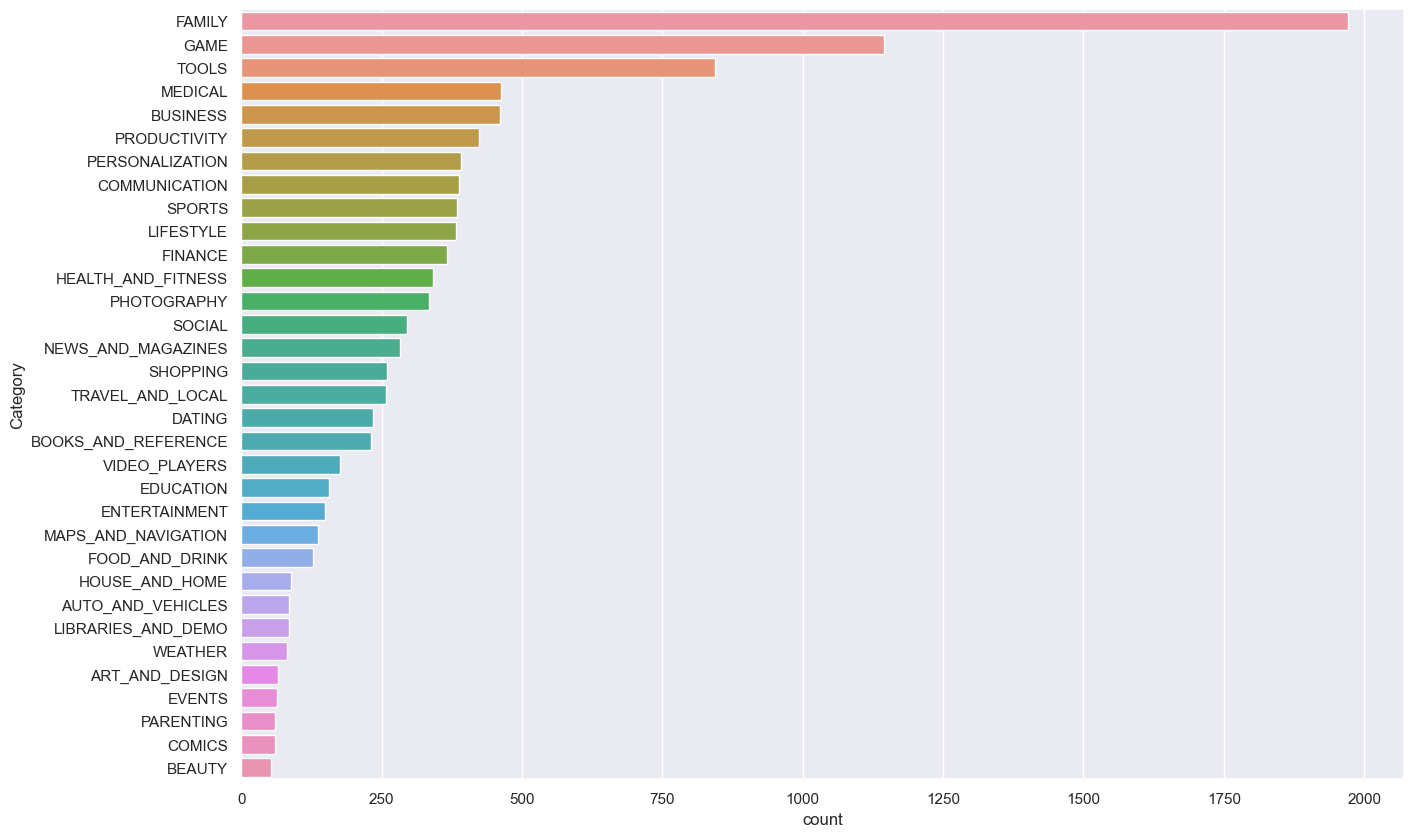

In [68]:
# Set the size of the graph
plt.figure(figsize = (15, 10))

# Count the occurrences of each category
category_counts = df['Category'].value_counts()

# Sort the categories based on their counts in descending order
sorted_categories = category_counts.sort_values(ascending = False).index

# Create the bar graph
sns.countplot(data = df, y = 'Category', order = sorted_categories)

# Display the graph
plt.show()

In [69]:
#top five categories
cat_count = pd.DataFrame(df['Category'].value_counts().sort_values(ascending = False))

#rename columns
cat_count = cat_count.rename(columns = {'Category': 'Count'}) 
cat_count.head()

,Count
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460


In [70]:
#percentage of family products
cat_fam = round((cat_count['Count']['FAMILY'] / sum(cat_count['Count'])) * 100, 1)
print('\033[1m' + str(cat_fam) + '\033[0m' + '% of Family products comprise the greatest share.')

18.2% of Family products comprise the greatest share.


- Family, Game and Tools are top three most popular categories of apps.

#### Bottom Five Categories

In [71]:
#percentage of bottom five
cat_bottom = round(sum(cat_count['Count'].tail()) / sum(cat_count['Count']) * 100, 1)
print('\033[1m' + str(cat_bottom) + '\033[0m' + '% of products comprise the bottom five categories.')

2.8% of products comprise the bottom five categories.


#### Most Expensive Categories

In [72]:
#group categories and compute correspondig mean prices; arrange in descending order
mean_price = pd.DataFrame(df.groupby(['Category'])['Price'].mean().sort_values(ascending = False))

#top five categories
mean_price.head()

,Price
Category,
FINANCE,7.93
LIFESTYLE,6.18
MEDICAL,3.11
EVENTS,1.72
FAMILY,1.23


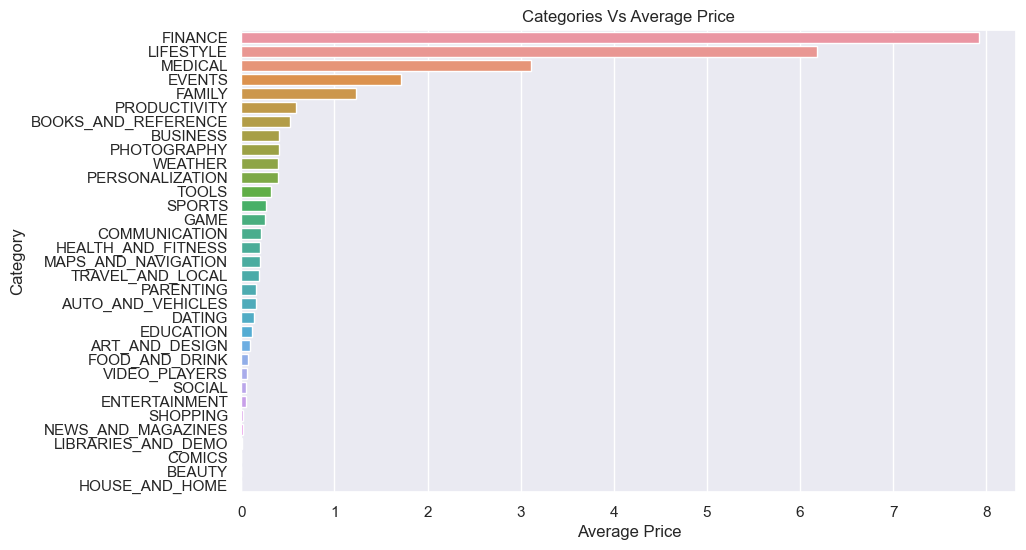

In [73]:
# Sort the DataFrame by the mean values in descending order
mean_price_sorted = mean_price.sort_values(by = 'Price', ascending=False)

#size of plot
plt.figure(figsize=(10, 6))

#create bar graph
sns.barplot(y = 'Category', x = 'Price', data = df, order = mean_price_sorted.index, errorbar = None) 

# Customize the plot
plt.ylabel('Category')
plt.xlabel('Average Price')
plt.title('Categories Vs Average Price')

# Display the plot
plt.show();

In [74]:
#products influencing the average cost of Finance
df[df['Category'] == 'FINANCE'].sort_values(by = 'Price', ascending = False).iloc[: , [0,1,6]].head(10)

,App,Category,Price
5364,I am rich (Most expensive app),FINANCE,399.99
5369,I am Rich,FINANCE,399.99
5356,I Am Rich Premium,FINANCE,399.99
5359,I am rich(premium),FINANCE,399.99
5358,I am Rich!,FINANCE,399.99
5373,I AM RICH PRO PLUS,FINANCE,399.99
9917,Eu Sou Rico,FINANCE,394.99
9905,Eu sou Rico,FINANCE,30.99
9104,Dz kayas,FINANCE,28.99
5361,I am Rich Premium Plus,FINANCE,18.99


In [75]:
#products influencing the average cost of Lifestyle
df[df['Category'] == 'LIFESTYLE'].sort_values(by = 'Price', ascending = False).iloc[: , [0,1,6]].head(10)

,App,Category,Price
4367,I'm Rich - Trump Edition,LIFESTYLE,400.00
5351,I am rich,LIFESTYLE,399.99
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,399.99
4362,💎 I'm rich,LIFESTYLE,399.99
5357,I am extremely Rich,LIFESTYLE,379.99
5355,I am rich VIP,LIFESTYLE,299.99
5360,I am Rich Person,LIFESTYLE,37.99
7165,My Movies Pro - Movie & TV Collection Library,LIFESTYLE,7.99
5578,Sleep as Android Unlock,LIFESTYLE,5.99
8887,The Secret Daily Teachings,LIFESTYLE,4.99


- Different versions of the expensive I am Rich app influenced the overall average cost of the Finance and Lifestyle category.

#### Best Rated Categories

In [76]:
#group categories and compute corresponding mean ratings; arrange in descending order
mean_rating = pd.DataFrame(df.groupby(['Category'])['Rating'].mean().sort_values(ascending = False))

#top five categories
mean_rating.head()

,Rating
Category,
EDUCATION,4.39
EVENTS,4.36
ART_AND_DESIGN,4.35
BOOKS_AND_REFERENCE,4.31
PERSONALIZATION,4.31


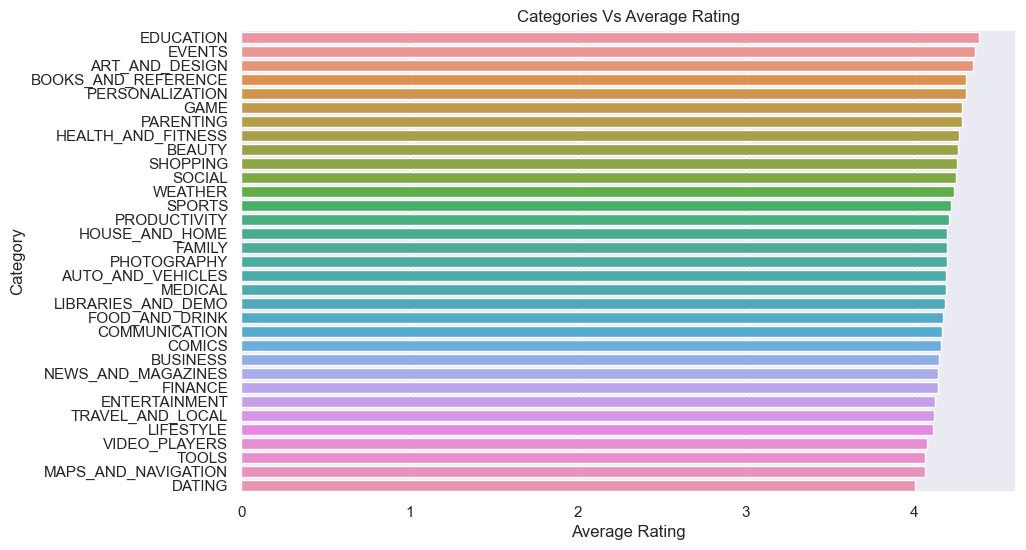

In [77]:
# Sort the DataFrame by the mean values in descending order
mean_rating_sorted = mean_rating.sort_values(by = 'Rating', ascending=False)

# Plot the categorical column and the mean values in descending order
plt.figure(figsize = (10, 6))
sns.barplot(y = 'Category', x = 'Rating', data = df, order = mean_rating_sorted.index, errorbar = None)  # Plot the categorical column

# Customize the plot
plt.ylabel('Category')
plt.xlabel('Average Rating')
plt.title('Categories Vs Average Rating')

# Display the plot
plt.show()

#### Most Reviewed Categories

In [78]:
#group categories and return top five with the highest average reviews
mean_reviews = pd.DataFrame(df.groupby(['Category'])['Reviews'].mean().sort_values(ascending = False))

#first five rows
mean_reviews.head()

,Reviews
Category,
COMMUNICATION,2107137.62
SOCIAL,2105903.13
GAME,1385858.70
PHOTOGRAPHY,637363.13
VIDEO_PLAYERS,630743.93


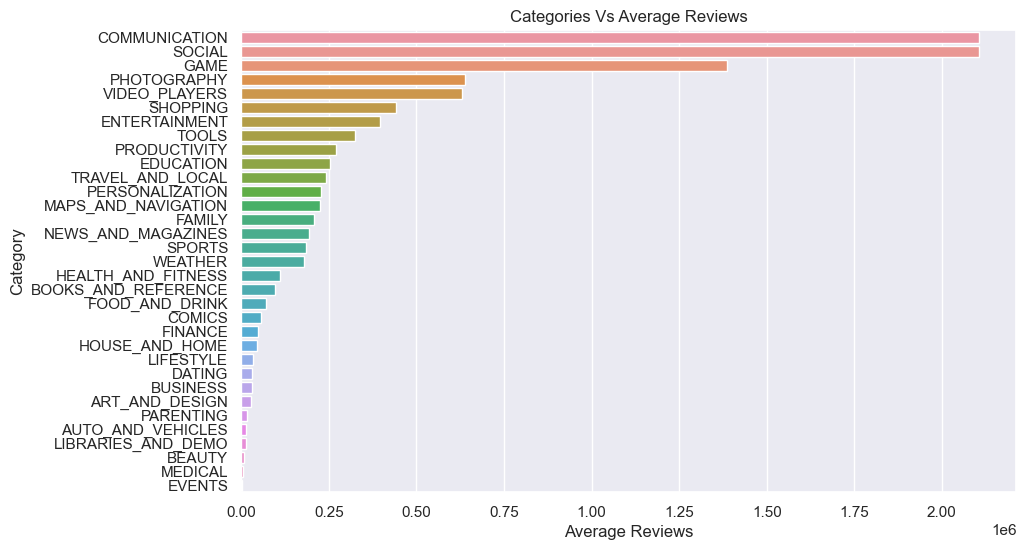

In [79]:
# Sort the DataFrame by the mean values in descending order
mean_reviews_sorted = mean_reviews.sort_values(by = 'Reviews', ascending=False)

# Plot the categorical column and the mean values in descending order
plt.figure(figsize = (10, 6))
sns.barplot(y = 'Category', x = 'Reviews', data = df, order = mean_reviews_sorted.index, errorbar = None)  # Plot the categorical column

# Customize the plot
plt.ylabel('Category')
plt.xlabel('Average Reviews')
plt.title('Categories Vs Average Reviews')

# Display the plot
plt.show()

In [80]:
#products influencing the average number of Reviews
df[df['Category'] == 'COMMUNICATION'].sort_values(by = 'Reviews', ascending = False).head(10).iloc[:,[0,3]]

,App,Reviews
381,WhatsApp Messenger,69119316.00
336,WhatsApp Messenger,69119316.00
3904,WhatsApp Messenger,69109672.00
382,Messenger – Text and Video Chat for Free,56646578.00
335,Messenger – Text and Video Chat for Free,56642847.00
4104,Messenger – Text and Video Chat for Free,56642847.00
420,UC Browser - Fast Download Private & Secure,17714850.00
378,UC Browser - Fast Download Private & Secure,17712922.00
3971,UC Browser - Fast Download Private & Secure,17712922.00
6449,BBM - Free Calls & Messages,12843436.00


- WhatsApp Messenger and Messenger - Text & Video Chat For Free are the impacting products.

In [81]:
#products influencing the average number of Reviews
df[df['Category'] == 'SOCIAL'].sort_values(by = 'Reviews', ascending = False).head(10).iloc[:,[0,3]]

,App,Reviews
2544,Facebook,78158306.00
3943,Facebook,78128208.00
2604,Instagram,66577446.00
2545,Instagram,66577313.00
2611,Instagram,66577313.00
3909,Instagram,66509917.00
2610,Snapchat,17015352.00
2550,Snapchat,17014787.00
2603,Snapchat,17014705.00
3870,Snapchat,17000166.00


- Facebook, Instagram and Snapchat are the impacting products in the SOCIAL category.

#### Categories with Most Product Installations

In [82]:
#group categories and compute means
mean_installs = pd.DataFrame(df.groupby(['Category'])['Installs'].mean().sort_values(ascending = False))

#return top five
mean_installs.head()

,Installs
Category,
COMMUNICATION,84359886.95
SOCIAL,47694467.46
VIDEO_PLAYERS,35554301.26
PRODUCTIVITY,33434177.76
GAME,30669601.76


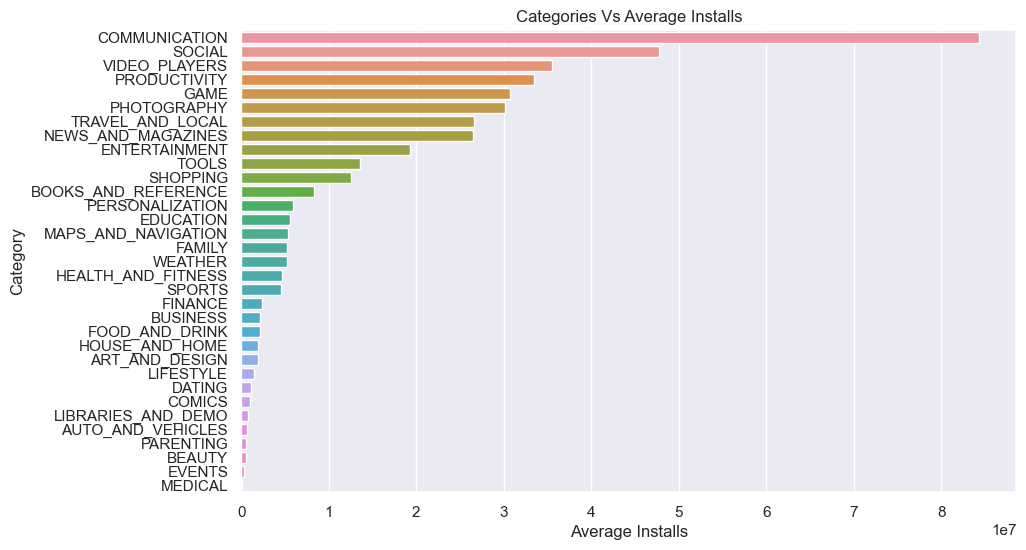

In [83]:
# Sort the DataFrame by the mean values in descending order
mean_installs_sorted = mean_installs.sort_values(by = 'Installs', ascending=False)

# Plot the categorical column and the mean values in descending order
plt.figure(figsize = (10, 6))
sns.barplot(y = 'Category', x = 'Installs', data = df, order = mean_installs_sorted.index, errorbar = None)  # Plot the categorical column

# Customize the plot
plt.ylabel('Category')
plt.xlabel('Average Installs')
plt.title('Categories Vs Average Installs')

# Display the plot
plt.show()

In [84]:
#products influencing the average number of Installs
df[df['Category'] == 'COMMUNICATION'].sort_values(by = 'Installs', ascending = False).head(10).iloc[:,[0,5]]

,App,Installs
335,Messenger – Text and Video Chat for Free,1000000000.00
4234,Skype - free IM & video calls,1000000000.00
391,Skype - free IM & video calls,1000000000.00
411,Google Chrome: Fast & Secure,1000000000.00
386,Hangouts,1000000000.00
382,Messenger – Text and Video Chat for Free,1000000000.00
381,WhatsApp Messenger,1000000000.00
451,Gmail,1000000000.00
464,Hangouts,1000000000.00
468,Skype - free IM & video calls,1000000000.00


- Messenger - Text and Video Chat For Free, Skype, Google Chrome, Hangouts, WhatsApp Messenger, GMail are the influencing products in this category.

### CONTENT RATING

In [85]:
#top five content ratings
cont_count = pd.DataFrame(df['Content Rating'].value_counts().sort_values(ascending = False))

#rename columns
cont_count = cont_count.rename(columns = {'Content Rating': 'Count'}) 
cont_count

,Count
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


#### BAR GRAPH CONTENT RATING

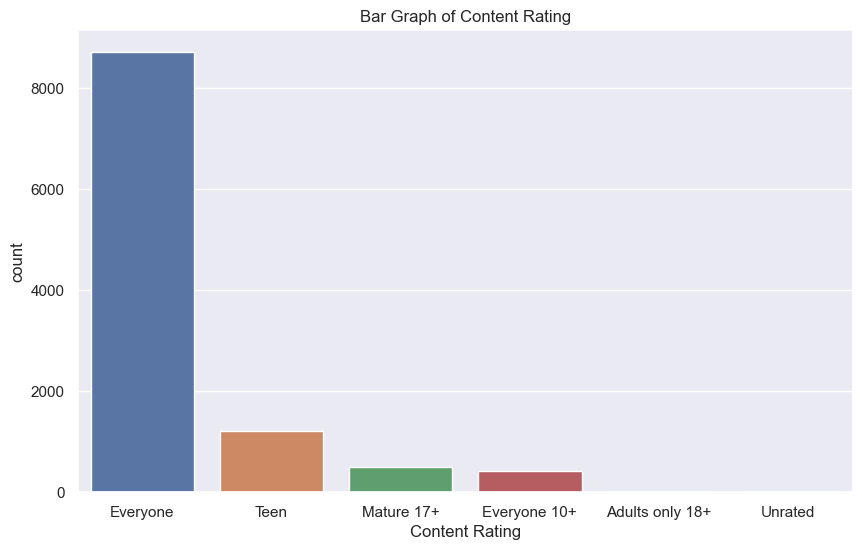

In [86]:
# Custom graph size
plt.figure(figsize = (10, 6))

# indices of filtered column with relative counts sorted in descending order
order = df['Content Rating'].value_counts().sort_values(ascending = False).index

#create bar graph
sns.countplot(data = df, x = 'Content Rating', order = order)

#x-axis title
plt.xlabel('Content Rating')

#title of graph
plt.title('Bar Graph of Content Rating')

# Display the plot
plt.show()

- 'Everyone' has the most products while 'Unrated' has the least.

#### TREE MAP CONTENT RATING

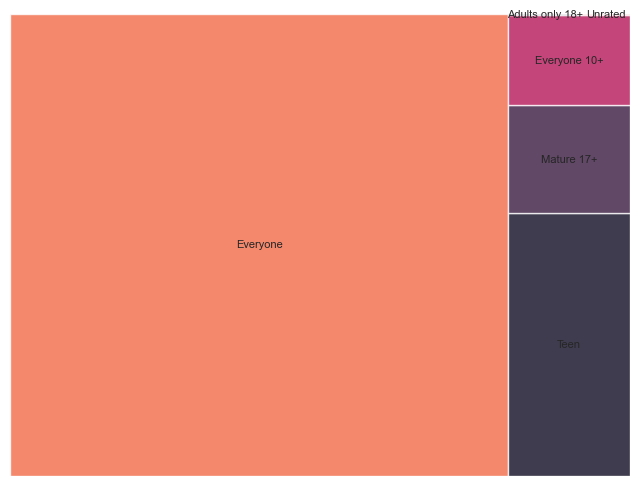

In [87]:
#library for creating tree map
import squarify

# Assuming df is the DataFrame containing the 'Content Rating' column
result = pd.DataFrame(df['Content Rating'].value_counts())

# Rename the columns
result = result.rename(columns = {'Content Rating': 'Count'})

# Rename the first column
result = result.rename_axis('Group')

#size of the plot
plt.figure(figsize = (8,6))

# Plot the treemap
squarify.plot(sizes = result['Count'], label = result.index, alpha = 0.8, text_kwargs = {'fontsize': 8})

#remove labels on x and y axis
plt.axis('off')

#display graph
plt.show();

#### 'Everyone' Content Rating

In [88]:
#filter value in first row of first column and divide by total number of rows; compute percentage
cont_perc = round((cont_count.iloc[0, 0] / df.shape[0]), 1) * 100

#print statements
print('\033[1m',cont_perc * df.shape[0],'\033[0m','products are Everyone content rating.')
print('\033[1m',cont_perc,'\033[0m','% of products are Everyone content rating.')

 867200.0  products are Everyone content rating.
 80.0  % of products are Everyone content rating.


#### Most Expensive Content Rating Category

In [89]:
# Create a DataFrame of the grouped content rating categories and relative average prices; arrange in descending order
cont_price = pd.DataFrame(df.groupby('Content Rating')['Price'].mean().sort_values(ascending=False))
cont_price

,Price
Content Rating,
Everyone,1.17
Teen,0.54
Everyone 10+,0.38
Mature 17+,0.24
Adults only 18+,0.00
Unrated,0.00


#### Bar Graph of Expensive Content Rating Group

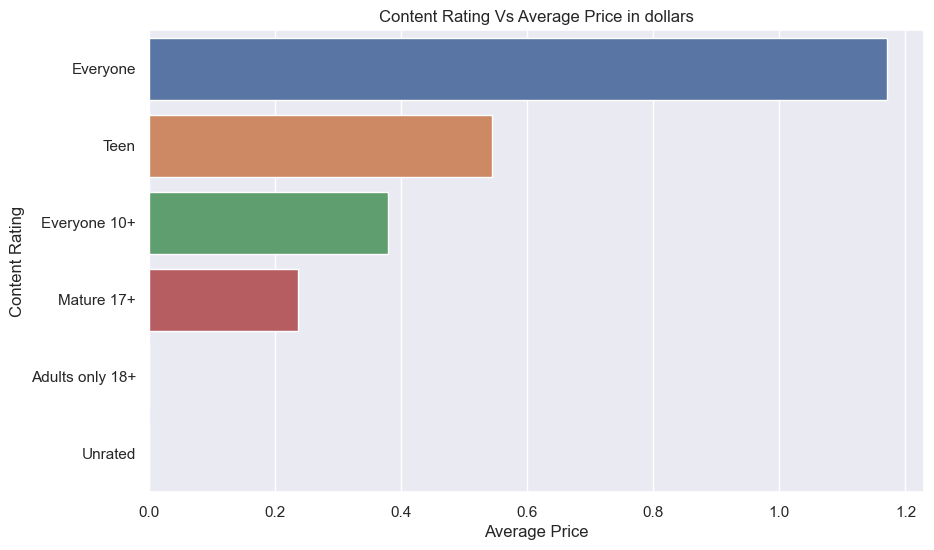

In [90]:
# Plot the categorical column and the mean values in descending order
#size of plot
plt.figure(figsize = (10, 6))

# Plot the categorical column
sns.barplot(y = 'Content Rating', x = 'Price', data = df, order = cont_price.index, errorbar = None)  

# Customize the plot
plt.ylabel('Content Rating')
plt.xlabel('Average Price')
plt.title('Content Rating Vs Average Price in dollars')

# Display the plot
plt.show()

#### Stem Plot of Expensive Content Rating Group

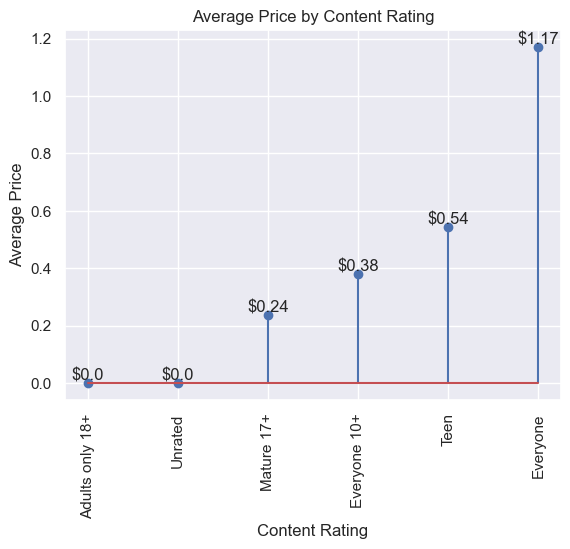

In [91]:
#reorder the values
cont_price_sorted = cont_price.sort_values(by = 'Price' )

# Create the plot
plt.stem(range(len(cont_price_sorted)), cont_price_sorted)
plt.xticks(range(len(cont_price_sorted)), cont_price_sorted.index, rotation=90)

# Add value labels to the lollipops
for i, price in enumerate(cont_price_sorted.values):
    plt.text(i, float(price), f"${round(float(price), 2)}", ha='center', va='bottom')

# Customize the plot
plt.xlabel('Content Rating')
plt.ylabel('Average Price')
plt.title('Average Price by Content Rating')

# Show the plot
plt.show()

In [92]:
#products influencing the average price
df[df['Content Rating'] == 'Everyone'].sort_values(by = 'Price', ascending = False).head(10).iloc[: , [0,-2,-1]]

,App,Price,Content Rating
4367,I'm Rich - Trump Edition,400.00,Everyone
5362,I Am Rich Pro,399.99,Everyone
5354,I am Rich Plus,399.99,Everyone
5359,I am rich(premium),399.99,Everyone
4362,💎 I'm rich,399.99,Everyone
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,399.99,Everyone
5369,I am Rich,399.99,Everyone
5373,I AM RICH PRO PLUS,399.99,Everyone
5356,I Am Rich Premium,399.99,Everyone
4197,most expensive app (H),399.99,Everyone


- 'Everyone' is the most expensive content rating group
- Highly due to the expensive I am Rich app.

In [93]:
##the content rating category as it relates to average rating
cont_rating = pd.DataFrame(df.groupby(['Content Rating'])['Rating'].mean().sort_values(ascending = False))
cont_rating

,Rating
Content Rating,
Adults only 18+,4.30
Everyone 10+,4.25
Teen,4.23
Everyone,4.19
Unrated,4.15
Mature 17+,4.13


#### Bar Graph of Best Rated Content Rating Categories

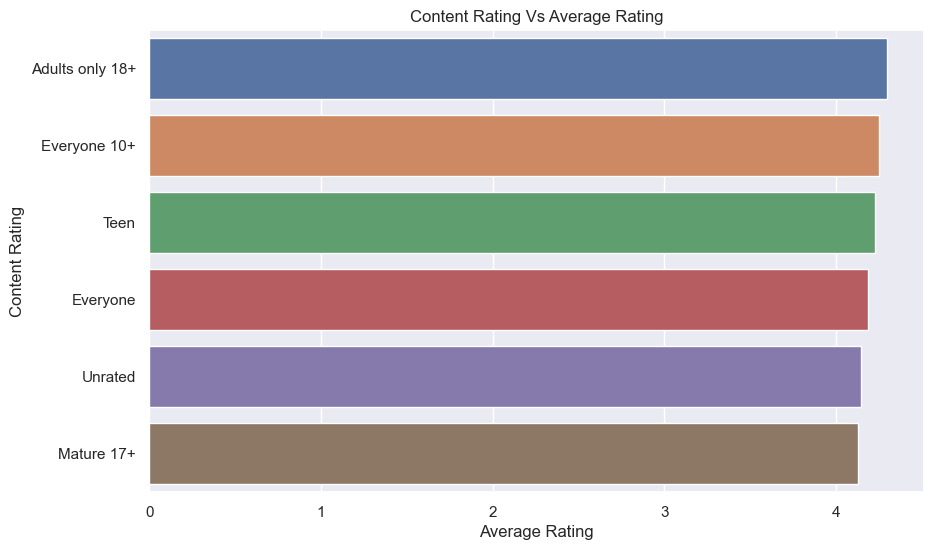

In [94]:
# Plot the categorical column and the mean values in descending order
#size of graph
plt.figure(figsize = (10, 6))

#create bargraph
sns.barplot(y = 'Content Rating', x = 'Rating', data = df, order = cont_rating.index, errorbar = None)  # Plot the categorical column

# label on y-axis
plt.ylabel('Content Rating')

#label on x-axis
plt.xlabel('Average Rating')

#title of plot
plt.title('Content Rating Vs Average Rating')

# Display the plot
plt.show();

#### Stem Plot of Best Rated Content Rating Group Rating

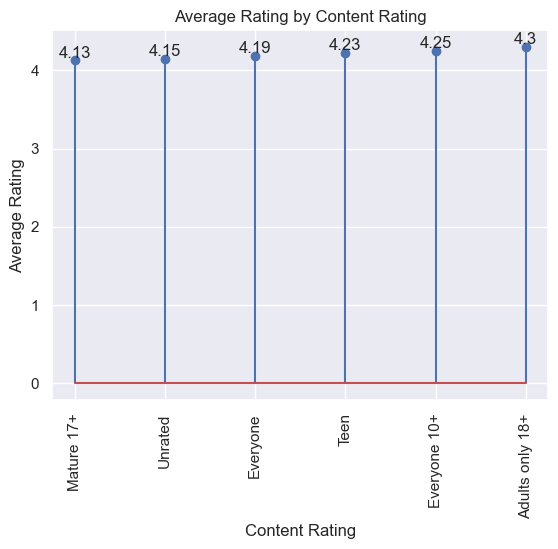

In [95]:
# Create a DataFrame of the content rating category as it relates to average rating
ordered_rating = cont_rating.sort_values(by = 'Rating')

# Create the stem plot
#specify the values for the x and y axis respectively
plt.stem(range(len(ordered_rating)), ordered_rating) 

#specify labels for the x and y values respectively
plt.xticks(range(len(ordered_rating)), ordered_rating.index, rotation=90) 

# Add text annotations to the lollipops/stems
for i, rating in enumerate(ordered_rating.values):
    plt.text(i, float(rating), f"{round(float(rating), 2)}", ha='center', va='bottom')

#title on x-axis
plt.xlabel('Content Rating')

#title on y-axis
plt.ylabel('Average Rating')

#title of graph
plt.title('Average Rating by Content Rating')

# Show the plot
plt.show();

In [96]:
#group categories and compute mean values and arrange in descending order
cont_installs = pd.DataFrame(df.groupby('Content Rating')['Installs'].mean().sort_values(ascending = False))
cont_installs

,Installs
Content Rating,
Everyone 10+,31965898.06
Teen,28738700.66
Everyone,13100374.07
Mature 17+,11071124.61
Adults only 18+,666666.67
Unrated,25250.00


#### Bar Graph of Best Rated Content Rating Categories

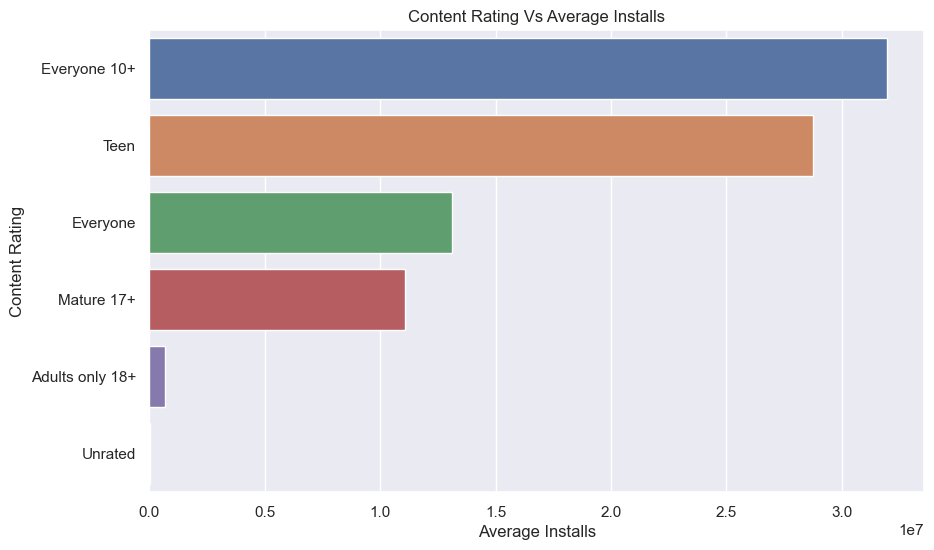

In [97]:
# Plot the categorical column and the mean values in descending order
plt.figure(figsize = (10, 6))

# Plot the categorical column
sns.barplot(y = 'Content Rating', x = 'Installs', data = df, order = cont_installs.index, errorbar = None)  

# Customize the plot
plt.ylabel('Content Rating')
plt.xlabel('Average Installs')
plt.title('Content Rating Vs Average Installs')

# Display the plot
plt.show();

#### Stem Plot of Best Rated Content Rating Categories

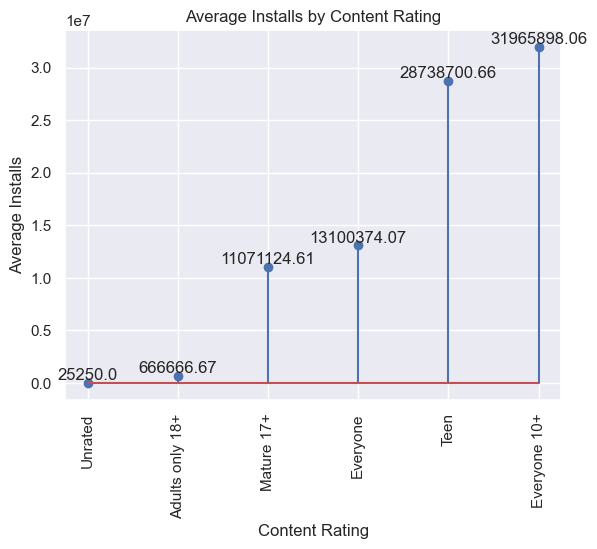

In [98]:
#sort filtered dataframe by installs column in ascending order 
ordered_installs = cont_installs.sort_values(by = 'Installs')

# Create the plot
#specify values for the x and y axis respectively
plt.stem(range(len(ordered_installs)), ordered_installs)

#customize labels on x-axis and change orientation
plt.xticks(range(len(ordered_installs)), ordered_installs.index, rotation = 90)

# Add text annotations to the stems
for i, installs in enumerate(ordered_installs.values):
    plt.text(i, float(installs), f"{round(float(installs), 2)}", ha='center', va='bottom')

# label on x-axis
plt.xlabel('Content Rating')

#label on y-axis
plt.ylabel('Average Installs')

#title of graph
plt.title('Average Installs by Content Rating')

# Show the plot
plt.show();

In [99]:
#products influencing the average installs
df[df['Content Rating'] == 'Everyone 10+'].sort_values(by = 'Installs', ascending = False).head(10).iloc[:, [-1,0,-3,-2,2]].reset_index()

,index,Content Rating,App,Installs,Price,Rating
0,1917,Everyone 10+,Subway Surfers,1000000000.00,0.00,4.50
1,1750,Everyone 10+,Subway Surfers,1000000000.00,0.00,4.50
2,1654,Everyone 10+,Subway Surfers,1000000000.00,0.00,4.50
3,1872,Everyone 10+,Subway Surfers,1000000000.00,0.00,4.50
4,3896,Everyone 10+,Subway Surfers,1000000000.00,0.00,4.50
5,1700,Everyone 10+,Subway Surfers,1000000000.00,0.00,4.50
6,3755,Everyone 10+,Flipboard: News For Our Time,500000000.00,0.00,4.40
7,3767,Everyone 10+,Flipboard: News For Our Time,500000000.00,0.00,4.40
8,3819,Everyone 10+,Flipboard: News For Our Time,500000000.00,0.00,4.40
9,1748,Everyone 10+,ROBLOX,100000000.00,0.00,4.50


- Subway Surfers, Flipboard (News & Magazine) & Roblox (Game) are the impacting apps.
- All three are free and have good rating too.

#### Bar Graph of Most Reviewed Content Rating Categories

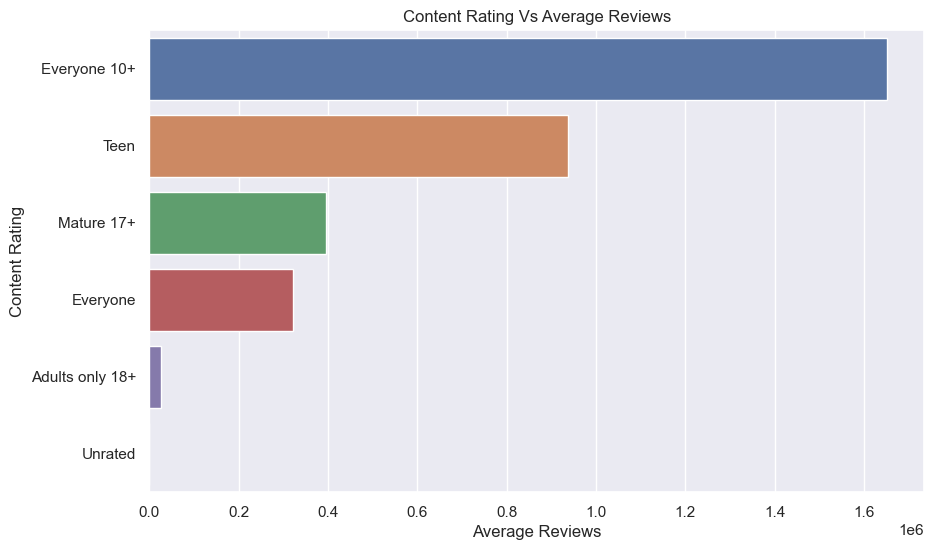

In [100]:
# Calculate the mean of the groups and arrange in descending order
cont_reviews = df.groupby('Content Rating')['Reviews'].mean().sort_values(ascending=False)

#size of plot
plt.figure(figsize = (10, 6))

#create bar graph
sns.barplot(y = 'Content Rating', x = 'Reviews', data = df, order = cont_reviews.index, errorbar = None)

# label on y-axis
plt.ylabel('Content Rating')

#label on x-axis
plt.xlabel('Average Reviews')

#title of graph
plt.title('Content Rating Vs Average Reviews')

# Display the plot
plt.show();

#### Stem Plot of Most Reviewed Content Rating Categories

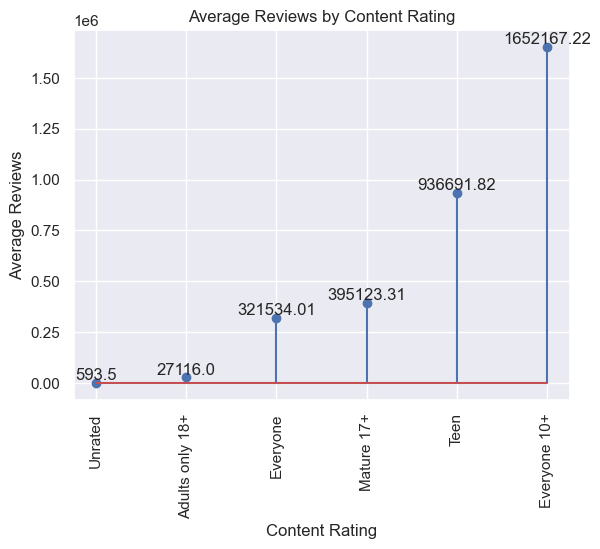

In [101]:
# Create a DataFrame of the content rating category as it relates to average price
ordered_reviews = cont_reviews.sort_values()

#Specify values for x and y axis respectively
plt.stem(range(len(ordered_reviews)), ordered_reviews)

#customize labels for x-axis values
plt.xticks(range(len(ordered_reviews)), ordered_reviews.index, rotation = 90)

# Add text annotations to the stems
for i, reviews in enumerate(ordered_reviews.values):
    plt.text(i, float(reviews), f"{round(float(reviews), 2)}", ha = 'center', va = 'bottom')

# x-axis title
plt.xlabel('Content Rating')

#y-axis label
plt.ylabel('Average Reviews')

#title of graph
plt.title('Average Reviews by Content Rating')

# Show the plot
plt.show();

In [102]:
#products influencing the average reviews
cont_rev = df[df['Content Rating'] == 'Everyone 10+'].sort_values(by = 'Reviews', ascending = False)

#filter relevant columns
cont_rev.head(15).iloc[:, [-1,0,3,-2,3]].reset_index(drop = True)

,Content Rating,App,Reviews,Price,Reviews
0,Everyone 10+,Clash of Clans,44893888.00,0.00,44893888.00
1,Everyone 10+,Clash of Clans,44891723.00,0.00,44891723.00
2,Everyone 10+,Clash of Clans,44891723.00,0.00,44891723.00
3,Everyone 10+,Clash of Clans,44881447.00,0.00,44881447.00
4,Everyone 10+,Subway Surfers,27725352.00,0.00,27725352.00
5,Everyone 10+,Subway Surfers,27725352.00,0.00,27725352.00
6,Everyone 10+,Subway Surfers,27724094.00,0.00,27724094.00
7,Everyone 10+,Subway Surfers,27723193.00,0.00,27723193.00
8,Everyone 10+,Subway Surfers,27722264.00,0.00,27722264.00
9,Everyone 10+,Subway Surfers,27711703.00,0.00,27711703.00


- Clash of Clans, Subway Surfers, Clash Royale and Shadow Fight 2 impact the results of this study.
- All are free games.

### VARIABLE CORRELATION

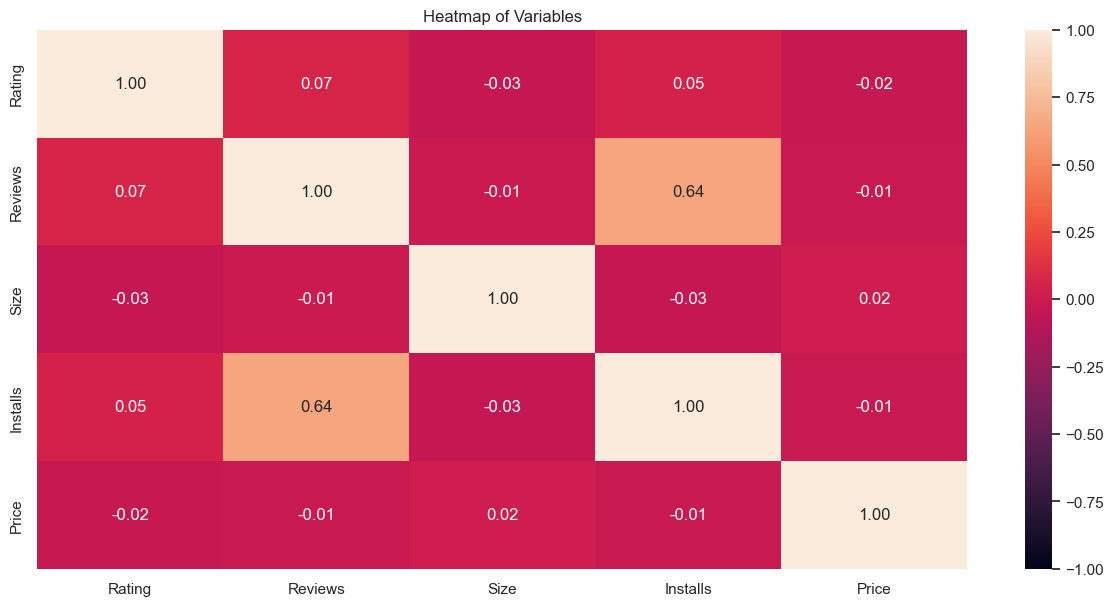

In [103]:
#compute the correlation between the numeric columns
corr = df.corr(numeric_only = True) 

#custom size configuration
plt.figure(figsize = (15, 7)) 

#title of heatmap
plt.title('Heatmap of Variables')

#create heatmap
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, fmt = '.2f')

#display the graph
plt.show; 

- Reviews and Installs shows the most significant correlation amongst the pairs.

#### Pairwise Relationship

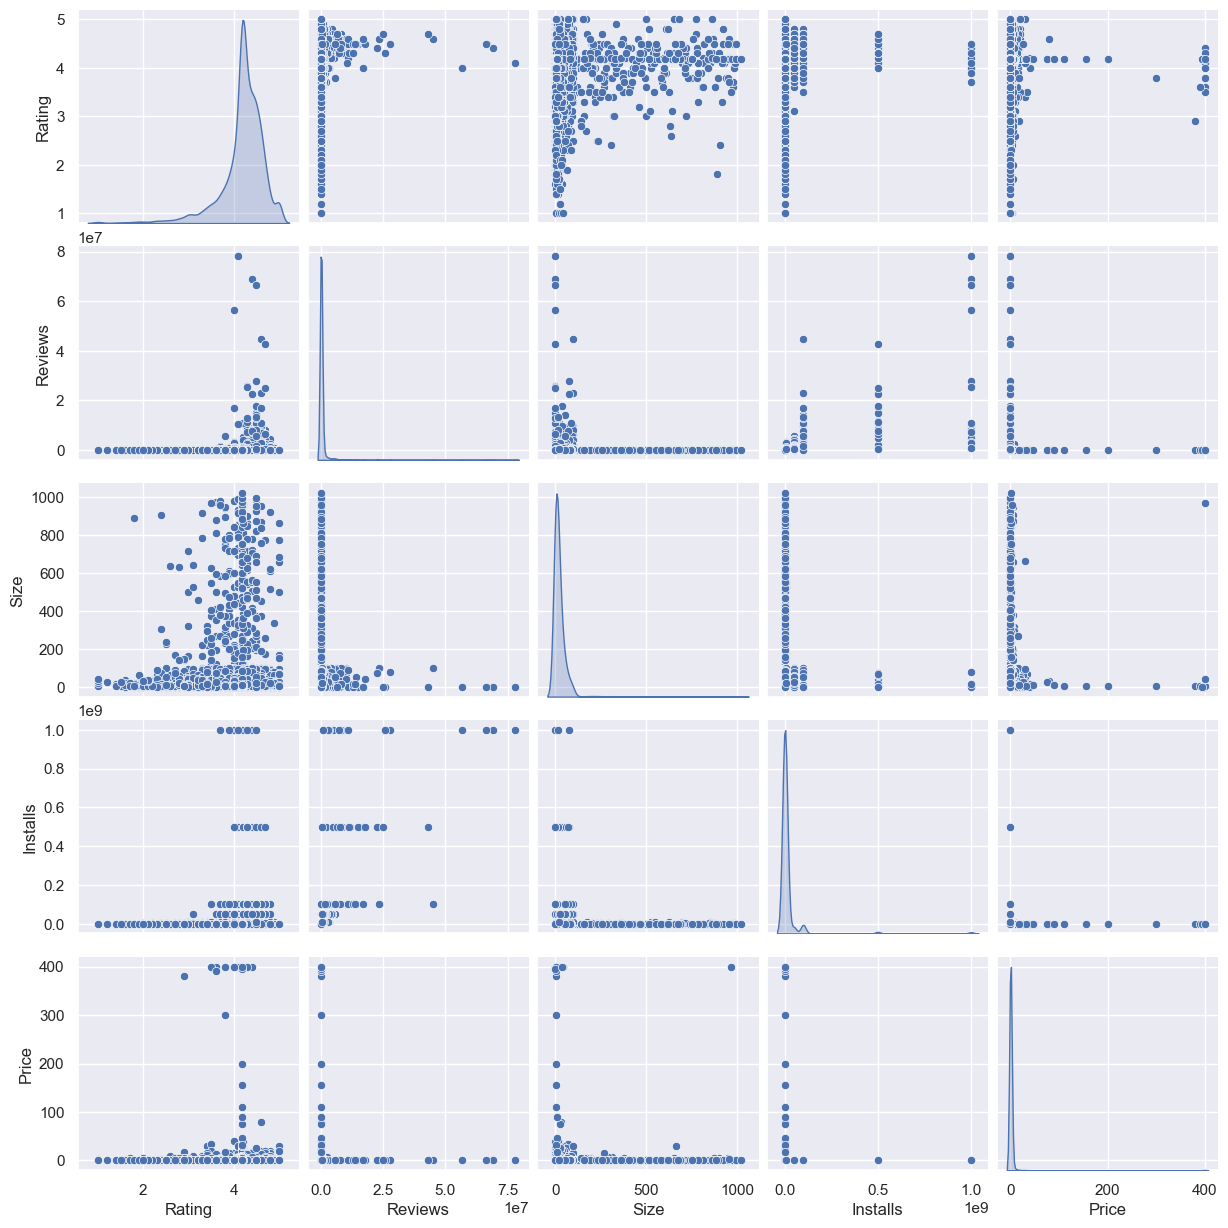

In [104]:
#create a grid of scatterplots to visualize the pairwise relationships between the multiple variables in a dataset 
# with regression
sns.pairplot(df, diag_kind = 'kde')

#display graph
plt.show();

#### Relationship between Installs and Reviews

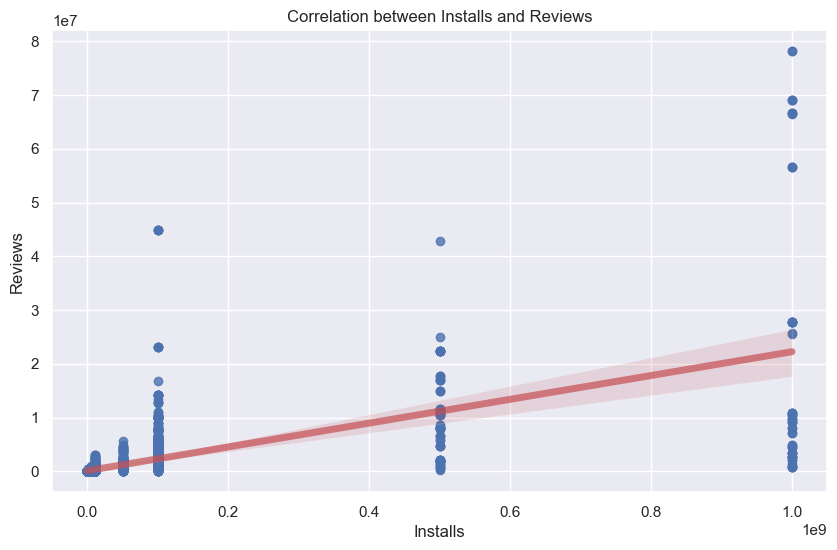

In [105]:
#edit plot size
plt.figure(figsize = (10, 6));

# plot scatter plot with regression line
sns.regplot(x=df["Installs"], y=df["Reviews"], line_kws={"color":"r","alpha":0.7,"lw":5})

#title of plot
plt.title('Correlation between Installs and Reviews')

#display graph
plt.show();

- The plot indicates an increase in number of reviews with increasing installations hence a positive correlation between the two variables.

### BUSINESS INSIGHTS AND RECOMMENDATIONS

- Instagram, Subway Surfers, Google Photos could be eligible for investment due to their great rating and installations.
- Subway Surfers, Facebook, YouTube show very active engagement so could be suitable for advertisements.
- WhatsApp, Instagram, Clash of Clans have at least 444K reviews and at least 4.5 rating so could be good for advertisement and investment.
- Only Number of reviews not an advisable criteria for investment or advertisement decisions.

### FUTURE WORK

- Perform a sentiment analysis to better understand the reviews posted by the subscribers.